In [100]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime, date
from dateutil.relativedelta import relativedelta

In [64]:
import numpy as np
import pandas as pd

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Source_Data/hawaii.sqlite")

In [5]:
# create a base
Base = automap_base()

In [8]:
# reflect an existing database into a new model
Base.prepare(engine, reflect=True)
inspector = inspect(engine)

# reflect the tables
inspector.get_table_names()

C:\Users\Captain\anaconda3\envs\PythonData\lib\site-packages\sqlalchemy\ext\declarative\clsregistry.py:129: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.measurement, and will be replaced in the string-lookup table.
  % (item.__module__, item.__name__)
C:\Users\Captain\anaconda3\envs\PythonData\lib\site-packages\sqlalchemy\ext\declarative\clsregistry.py:129: SAWarning: This declarative base already contains a class with the same class name and module name as sqlalchemy.ext.automap.station, and will be replaced in the string-lookup table.
  % (item.__module__, item.__name__)


['measurement', 'station']

In [19]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Check columns for measurement table.
columns_m = inspector.get_columns('measurement')
columns_s = inspector.get_columns('station')

In [32]:
for column in columns_m:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [33]:
for column in columns_s:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [107]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).\
    order_by(measurement.date.desc()).first()
    
recent_date

('2017-08-23')

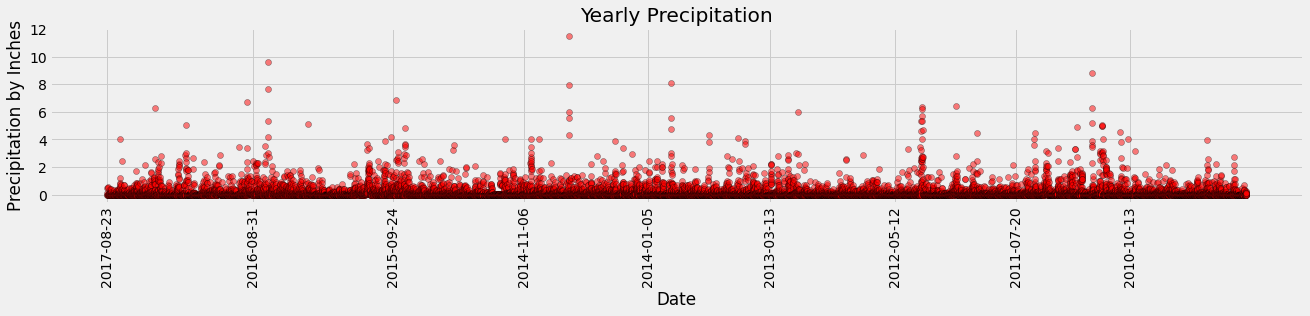

In [133]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Fina final date in set
last_date = session.query(measurement.date).\
    order_by(measurement.date.asc()).first()

# Calculate the date one year from the last date in data set.
date(2010,1,1)+relativedelta(months=+12)


# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(measurement.date, measurement.prcp).\
    order_by(measurement.date.asc()).first()


# Save the query results as a Pandas DataFrame and set the index to the date column
stmt = session.query(measurement.date, measurement.prcp).\
    order_by(measurement.date.desc()).statement
precipitation = pd.read_sql_query(stmt, session.bind)
precipitation.set_index('date', inplace=True, )
precipitation

# Use Pandas Plotting with Matplotlib to plot the data

x_axis = precipitation.index.values
plt.figure(figsize=(20,3))
plt.scatter(x_axis, precipitation['prcp'], marker="o", facecolors="red", edgecolors="black", alpha=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rotation="vertical")
plt.locator_params(nbins=9)
plt.title("Yearly Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation by Inches")
plt.show()

In [134]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()